#Preparation

##Import Library and File Accessing

In [278]:
import random
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

%matplotlib inline

In [279]:
#Mounting from Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [280]:
#Access Dataset in Indonesian and English
data_ds_ina = pd.read_csv('data_train_clean_v2.csv', delimiter=',')
data_ds_eng = pd.read_csv('TrainingID.csv', delimiter=',')
data_ds_eng.drop(" Tanpa nama: 133", axis=1, inplace=True)

##Check the Dataset

In [281]:
data_ds_ina.head()

,gatal,ruam_kulit,erupsi_kulit_nodal,bersin_terus_menerus,gemetaran,panas_dingin,nyeri_sendi,sakit_perut,keasaman,bisul_di_lidah,...,komedo,berteriak_teriak,pengelupasan_kulit,perak_seperti_debu,penyok_kecil_di_kuku,kuku_inflamasi,lepuh,sakit_merah_di_sekitar_hidung,kerak_kuning_keluar,prognosa
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19


In [282]:
#Check the columns in Indonesian
kolom_ina = list(data_ds_ina.columns)
kolom_ina

['gatal',
 'ruam_kulit',
 'erupsi_kulit_nodal',
 'bersin_terus_menerus',
 'gemetaran',
 'panas_dingin',
 'nyeri_sendi',
 'sakit_perut',
 'keasaman',
 'bisul_di_lidah',
 'pemborosan_otot',
 'muntah',
 'buang_air_kecil_yang_terbakar',
 'buang_air_kecil_bercak',
 'kelelahan',
 'penambahan_berat_badan',
 'kecemasan',
 'tangan_dan_kaki_dingin',
 'perubahan_suasana_hati',
 'penurunan_berat_badan',
 'kegelisahan',
 'kelesuan',
 'bercak_di_tenggorokan',
 'kadar_gula_tidak_teratur',
 'batuk',
 'demam_tinggi',
 'mata_cekung',
 'sesak_napas',
 'berkeringat',
 'dehidrasi',
 'gangguan_pencernaan',
 'sakit_kepala',
 'kulit_kekuningan',
 'urin_gelap',
 'mual',
 'kehilangan_selera_makan',
 'nyeri_di_belakang_mata',
 'sakit_punggung',
 'sembelit',
 'sakit_perut_1',
 'diare',
 'demam_ringan',
 'urin_kuning',
 'menguningnya_mata',
 'gagal_hati_akut',
 'kelebihan_cairan',
 'pembengkakan_perut',
 'kelenjar_getah_bening_membengkak',
 'rasa_tidak_enak',
 'penglihatan_kabur_dan_terdistorsi',
 'dahak',
 'irita

In [283]:
#Check the columns in English
data_ds_eng.columns = data_ds_eng.columns.str.strip()
data_ds_eng.columns = data_ds_eng.columns.str.replace(' ', '_')
kolom_eng = list(data_ds_eng.columns)
kolom_eng

['gatal',
 'ruam_kulit',
 'erupsi_kulit_nodal',
 'bersin_terus_menerus',
 'gemetaran',
 'panas_dingin',
 'nyeri_sendi',
 'sakit_perut',
 'keasaman',
 'bisul_di_lidah',
 'pemborosan_otot',
 'muntah',
 'buang_air_kecil_yang_terbakar',
 'buang_air_kecil_bercak',
 'kelelahan',
 'penambahan_berat_badan',
 'kecemasan',
 'tangan_dan_kaki_dingin',
 'perubahan_suasana_hati',
 'penurunan_berat_badan',
 'kegelisahan',
 'kelesuan',
 'bercak_di_tenggorokan',
 'kadar_gula_tidak_teratur',
 'batuk',
 'demam_tinggi',
 'mata_cekung',
 'sesak_napas',
 'berkeringat',
 'dehidrasi',
 'gangguan_pencernaan',
 'sakit_kepala',
 'kulit_kekuningan',
 'urin_gelap',
 'mual',
 'kehilangan_selera_makan',
 'nyeri_di_belakang_mata',
 'sakit_punggung',
 'sembelit',
 'sakit_perut.1',
 'diare',
 'demam_ringan',
 'urin_kuning',
 'menguningnya_mata',
 'gagal_hati_akut',
 'kelebihan_cairan',
 'pembengkakan_perut',
 'kelenjar_getah_bening_membengkak',
 'rasa_tidak_enak',
 'penglihatan_kabur_dan_terdistorsi',
 'dahak',
 'irita

In [284]:
#Checking the pre-translated symptom
index = kolom_ina.index('lewatnya_gas')
print(index)
print(kolom_eng[index])

92
lewatnya_gas


## Changing Some Columns Name

In [285]:
#Repair columns name
data_ds_ina = data_ds_ina.rename({'panas_dingin': 'panas_dingin_atau_meriang', 'kontak_perkawinan_ekstra': 'melakukan_hubungan_badan_di_luar_nikah', 'kehilangan_bau': 'kehilangan_penciuman', 'lepuh' : 'melepuh' , 'berjalan_yang_menyakitkan': 'kesakitan_saat_berjalan' , 'buang_air_kecil_yang_terbakar':'perih_buang_air_kecil', 'menguningnya_mata':'mata_menguning' , 'ekstremitas_bengkak':'pembengkakan_ekstremitas' , 'kelemahan_otot':'otot_melemah' , 'sensorium_yang_diubah':'perubahan_tingkat_kesadaran' , 'gatal_dalam':'gatal_dari_dalam_tubuh' , 'pemborosan_otot':'penyusutan_pada_otot' , 'dahak_berkarat':'dahak_berwarna_seperti_karat' , 'buang_air_kecil_bercak' : 'bercak_pada_urin','tampilan_beracun_atau_tifus':'tifus' ,'perak_seperti_debu':'kulit_menjadi_ke_abu_abuan' , 'distensi_abdomen':'kembung' , 'poliuria':'sering_buang_air_kecil' , 'kulit_kekuningan':'kulit_berwarna_kekuningan', 'ketidaknyamanan_kandung_kemih':'rasa_tidak_nyaman_pada_kandung_kemih' , 'ucapan_cadel':'cadel', 'sejarah_keluarga':'riwayat_keluarga', 'sakit_perut_2':'nyeri_perut','sakit_perut_1':'nyeri_di_bagian_perut', 'rasa_tidak_enak':'tidak_enak_badan','dahak_mukoid':'dahak_berlendir_dan_kental',}, axis='columns')

In [286]:
# data_ds_ina = data_ds_ina.drop(['kelebihan_cairan_1', 'sakit_perut_1', 'sakit_perut_2'], axis=1)

In [287]:
#Checkpoint
list(data_ds_ina.columns)

['gatal',
 'ruam_kulit',
 'erupsi_kulit_nodal',
 'bersin_terus_menerus',
 'gemetaran',
 'panas_dingin_atau_meriang',
 'nyeri_sendi',
 'sakit_perut',
 'keasaman',
 'bisul_di_lidah',
 'penyusutan_pada_otot',
 'muntah',
 'perih_buang_air_kecil',
 'bercak_pada_urin',
 'kelelahan',
 'penambahan_berat_badan',
 'kecemasan',
 'tangan_dan_kaki_dingin',
 'perubahan_suasana_hati',
 'penurunan_berat_badan',
 'kegelisahan',
 'kelesuan',
 'bercak_di_tenggorokan',
 'kadar_gula_tidak_teratur',
 'batuk',
 'demam_tinggi',
 'mata_cekung',
 'sesak_napas',
 'berkeringat',
 'dehidrasi',
 'gangguan_pencernaan',
 'sakit_kepala',
 'kulit_berwarna_kekuningan',
 'urin_gelap',
 'mual',
 'kehilangan_selera_makan',
 'nyeri_di_belakang_mata',
 'sakit_punggung',
 'sembelit',
 'nyeri_di_bagian_perut',
 'diare',
 'demam_ringan',
 'urin_kuning',
 'mata_menguning',
 'gagal_hati_akut',
 'kelebihan_cairan',
 'pembengkakan_perut',
 'kelenjar_getah_bening_membengkak',
 'tidak_enak_badan',
 'penglihatan_kabur_dan_terdistorsi'

# Compiling symptoms into a narrative

In [292]:
random.seed(0)
short_templates = ["Saya mengalami {}.", "{}."]
medium_templates = ["Saya seringkali mengalami {}.", "Gejala {} saya alami."]
long_templates = ["Gejala {} sangat mengganggu keseharian saya.", "Saya mengalami {} dalam beberapa hari terakhir."]

def to_symptoms_string(row: pd.Series) -> str:
    symptoms = row.index.values[row.values == 1].tolist()
    random.shuffle(symptoms)
    symptom_sentences = []
    if len(symptoms) <= 6:
        chosen_templates = long_templates
    elif len(symptoms) <= 12:
        chosen_templates = medium_templates
    else:
        chosen_templates = short_templates

    for symptom in symptoms:
        template = random.choice(chosen_templates)
        symptom_sentences.append(template.replace("{}", symptom))

    random.shuffle(symptom_sentences)

    res = " ".join(symptom_sentences) \
        .replace(" _", " ") \
        .replace("_ ", " ") \
        .replace("_", " ")

    return res

def add_noise(data):
    data['symptoms'] = data.apply(to_symptoms_string, axis=1)
    return data[['symptoms', 'prognosa']]

data_nlp = add_noise(data_ds_ina)


Text(0.5, 1.0, 'Distribution of description length')

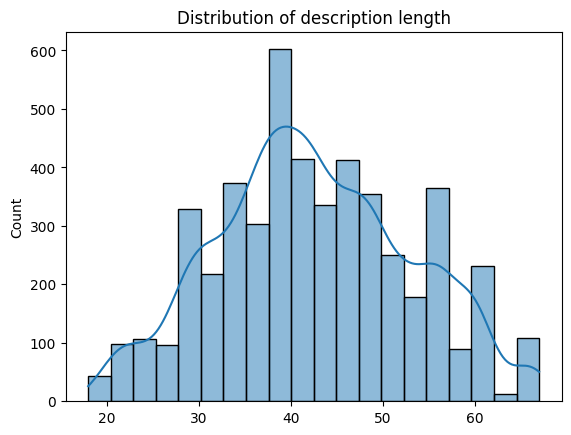

In [293]:
length = []
for txt in (data_nlp['symptoms'].values):
    length.append(len(txt.split()))

sea.histplot(length, kde = True, bins = 20)
plt.title('Distribution of description length')

In [294]:
data_nlp['prognosa'].value_counts()

prognosa
19    120
10    120
12    120
13    120
35    120
6     120
31    120
36    120
34    120
26    120
17    120
15    120
16    120
25    120
32    120
0     120
21    120
20    120
30    120
11    120
9     120
2     120
38    120
7     120
39    120
33    120
29    120
1     120
5     120
8     120
3     120
14    120
24    120
40    120
22    120
27    120
23    120
4     120
37    120
28    120
18    120
Name: count, dtype: int64

In [295]:
data_nlp

,symptoms,prognosa
0,Saya mengalami ruam kulit dalam beberapa hari ...,19
1,Saya mengalami erupsi kulit nodal dalam bebera...,19
2,Saya mengalami erupsi kulit nodal dalam bebera...,19
3,Saya mengalami gatal dalam beberapa hari terak...,19
4,Saya mengalami ruam kulit dalam beberapa hari ...,19
...,...,...
4915,Gejala sakit kepala sangat mengganggu kesehari...,0
4916,Saya mengalami jerawat berisi nanah dalam bebe...,21
4917,Gejala rasa urin terus menerus sangat menggang...,20
4918,Saya mengalami ruam kulit dalam beberapa hari ...,30


# Save the result

In [296]:
data_nlp.to_csv('Converted DS Dataset-revised-v2.csv', index = False, header = True, index_label = None, sep=';')

# remove stopwords list that same on data

In [297]:
gejala =['gatal',
 'Saya mengalami.',
 "Saya seringkali mengalami",
 "Gejala saya alami.",
 "Gejala sangat mengganggu keseharian saya.",
 "Saya mengalami dalam beberapa hari terakhir.",
 'ruam_kulit',
 'erupsi_kulit_nodal',
 'bersin_terus_menerus',
 'gemetaran',
 'panas_dingin_atau_meriang',
 'nyeri_sendi',
 'sakit_perut',
 'keasaman',
 'bisul_di_lidah',
 'penyusutan_pada_otot',
 'muntah',
 'perih_buang_air_kecil',
 'bercak_pada_urin',
 'kelelahan',
 'penambahan_berat_badan',
 'kecemasan',
 'tangan_dan_kaki_dingin',
 'perubahan_suasana_hati',
 'penurunan_berat_badan',
 'kegelisahan',
 'kelesuan',
 'bercak_di_tenggorokan',
 'kadar_gula_tidak_teratur',
 'batuk',
 'demam_tinggi',
 'mata_cekung',
 'sesak_napas',
 'berkeringat',
 'dehidrasi',
 'gangguan_pencernaan',
 'sakit_kepala',
 'kulit_berwarna_kekuningan',
 'urin_gelap',
 'mual',
 'kehilangan_selera_makan',
 'nyeri_di_belakang_mata',
 'sakit_punggung',
 'sembelit',
 'nyeri_di_bagian_perut',
 'diare',
 'demam_ringan',
 'urin_kuning',
 'mata_menguning',
 'gagal_hati_akut',
 'kelebihan_cairan',
 'pembengkakan_perut',
 'kelenjar_getah_bening_membengkak',
 'tidak_enak_badan',
 'penglihatan_kabur_dan_terdistorsi',
 'dahak',
 'iritasi_tenggorokan',
 'mata_merah',
 'tekanan_sinus',
 'pilek',
 'penyumbatan',
 'nyeri_dada',
 'kelemahan_pada_tungkai',
 'detak_jantung_cepat',
 'nyeri_saat_buang_air_besar',
 'nyeri_di_daerah_anus',
 'tinja_berdarah',
 'iritasi_pada_anus',
 'sakit_leher',
 'pusing',
 'kram',
 'memar',
 'kegemukan',
 'kaki_bengkak',
 'pembuluh_darah_membengkak',
 'wajah_dan_mata_sembab',
 'tiroid_yang_membesar',
 'kuku_rapuh',
 'pembengkakan_ekstremitas',
 'rasa_lapar_yang_berlebihan',
 'melakukan_hubungan_badan_di_luar_nikah',
 'bibir_kering_dan_kesemutan',
 'cadel',
 'sakit_lutut',
 'nyeri_sendi_panggul',
 'otot_melemah',
 'leher_kaku',
 'sendi_bengkak',
 'kekakuan_gerakan',
 'gerakan_berputar',
 'kehilangan_keseimbangan',
 'kegoyangan',
 'kelemahan_satu_sisi_tubuh',
 'kehilangan_penciuman',
 'rasa_tidak_nyaman_pada_kandung_kemih',
 'bau_urin_yang_busuk',
 'rasa_urin_terus_menerus',
 'lewatnya_gas',
 'gatal_dari_dalam_tubuh',
 'tifus',
 'depresi',
 'sifat_lekas_marah',
 'nyeri_otot',
 'perubahan_tingkat_kesadaran',
 'bintik_bintik_merah_di_sekujur_tubuh',
 'nyeri_perut',
 'menstruasi_yang_tidak_normal',
 'patch_diskromik',
 'berair_dari_mata',
 'nafsu_makan_meningkat',
 'sering_buang_air_kecil',
 'riwayat_keluarga',
 'dahak_berlendir_dan_kental',
 'dahak_berwarna_seperti_karat',
 'kurang_konsenterasi',
 'gangguan_penglihatan',
 'menerima_transfusi_darah',
 'menerima_suntikan_yang_tidak_steril',
 'koma',
 'pendarahan_perut',
 'kembung',
 'riwayat_konsumsi_alkohol',
 'kelebihan_cairan_1',
 'darah_dalam_dahak',
 'pembuluh_darah_menonjol_di_betis',
 'palpitasi',
 'kesakitan_saat_berjalan',
 'jerawat_berisi_nanah',
 'komedo',
 'berteriak_teriak',
 'pengelupasan_kulit',
 'kulit_menjadi_ke_abu_abuan',
 'penyok_kecil_di_kuku',
 'kuku_inflamasi',
 'melepuh',
 'sakit_merah_di_sekitar_hidung',
 'kerak_kuning_keluar']

In [298]:
import numpy as np
gejala = np.array(gejala)

In [299]:
stopwords = ['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua',
            'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena',
            'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar',
            'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah',
            'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga',
            'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda',
            'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka',
            'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya',
            'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah',
            'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh',
            'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin',
            'juga', 'nggak', 'mari', 'nanti', 'melainkan', 'oh', 'ok', 'seharusnya', 'sebetulnya',
            'setiap', 'setidaknya', 'sesuatu', 'pasti', 'saja', 'toh', 'ya', 'walau', 'tolong',
            'tentu', 'amat', 'apalagi', 'bagaimanapun']

In [301]:
datasama, kata = [], []
for i in range(len(gejala)):
    gejala[i] = gejala[i].lower()
    gejala[i] = gejala[i].replace('_', ' ')
    kata.append(gejala[i].split())

for i in range(len(kata)):
    for j in range(len(kata[i])):
        if kata[i][j] in stopwords:
            datasama.append(kata[i][j])

In [302]:
datasama=np.unique(datasama)
datasama

array(['atau', 'dalam', 'dan', 'dari', 'di', 'ke', 'pada', 'saat', 'saya',
       'sekitar', 'seperti', 'tidak', 'yang'], dtype='<U7')